In [2]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
from PIL import Image

In [ ]:
env = h_env.HockeyEnv()
obs,info = env.reset()

print(obs)

img = env.render(mode='rgb_array')
img = Image.fromarray(img)
img.save('./test1.png')

env.set_state(obs)

obs = env._get_obs()
print(obs)

img = env.render(mode='rgb_array')
img = Image.fromarray(img)
img.save('./test2.png')

In [3]:
np.set_printoptions(suppress=True)

In [4]:
reload(h_env)

f:\conda2\envs\TeamProject\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
f:\conda2\envs\TeamProject\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'f:\\conda2\\envs\\TeamProject\\Lib\\site-packages\\hockey\\hockey_env.py'>

# Normal Game Play

In [5]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [7]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [8]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.11520330125516254,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [9]:
env.close()

# Train Shooting

In [125]:
env = h_env.HockeyEnv(mode="TRAIN_SHOOTING")

In [126]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [129]:
env.close()

# Train DEFENDING

In [10]:
env = h_env.HockeyEnv(mode="TRAIN_DEFENSE")

In [21]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
0.0
0.0
0.0
-0.5117104622638589
-0.3714180179145118
-0.25896054690800013
-0.1694817430839732
-0.08580511306995818
-0.05554790789935352
-0.15752841759399266
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.2469706142471585
-0.1393820559187169
-0.07526995977100036
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [60]:
env.close()

# Using discrete actions

In [22]:
import random

In [23]:
env = h_env.HockeyEnv(mode="TRAIN_SHOOTING")

In [24]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [146]:
env.close()

# Hand-crafted Opponent

In [25]:
env = h_env.HockeyEnv()

In [27]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [29]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [86]:
np.mean(obs_buffer,axis=0)

array([-3.00395525, -0.50374938, -0.02116234, -0.06717156, -0.15966231,
        0.04815747,  3.0476194 , -0.48386269,  0.06317957,  0.07613489,
        0.12648685, -0.02141313,  0.13654078, -0.9636926 , -0.32211663,
       -0.2758675 ,  0.83665339,  0.83665339])

In [87]:
np.std(obs_buffer,axis=0)

array([ 0.82803568,  0.82589091,  0.64145426,  3.89347873,  4.9277954 ,
        3.5254597 ,  0.53941228,  0.55148611,  0.13819168,  2.95571831,
        1.38140968,  0.70205223,  2.11977182,  1.63362734, 18.25632718,
        9.00474826,  2.95672829,  2.95672829])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [88]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [89]:
import pylab as plt

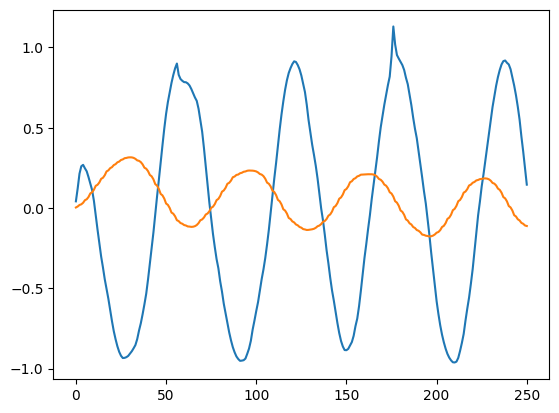

In [90]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

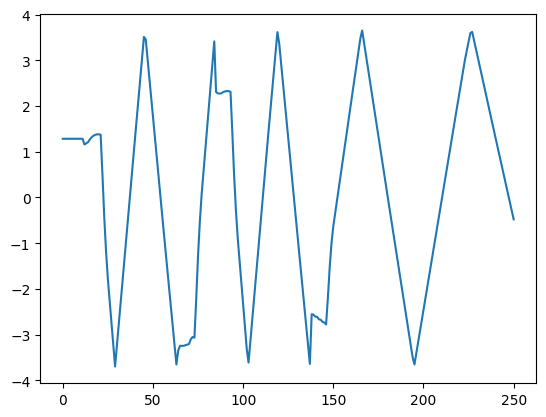

In [91]:
plt.plot(obs_buffer[:,12])

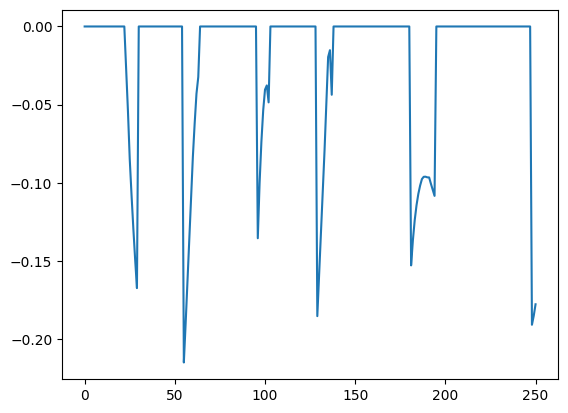

In [92]:
plt.plot(reward_buffer[:])

In [93]:
np.sum(reward_buffer)

-5.126782784723617

In [94]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': -0.17776552710470656,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.001409984588623047},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.001409984588623047},
 -0.17776552710470656,
 0.0)

In [95]:
env.close()

# Human Opponent

In [147]:
env = h_env.HockeyEnv()

In [148]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [149]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [150]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [151]:
env.close()

# Check side consistency

In [30]:
env = h_env.HockeyEnv()

In [31]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

: 

In [101]:
obs_buffer.shape

(147059, 18)

In [102]:
np.mean(obs_buffer,axis=0)

array([-2.94902842, -0.01610915, -0.00007153, -0.06194113, -0.01034325,
        0.01244913,  2.9539016 , -0.0032601 , -0.00042009,  0.05680149,
       -0.00232226,  0.00059234,  0.0270929 , -0.02177997,  0.00761505,
        0.00447316,  1.14596862,  1.14025663])

In [103]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([ 0.00817338, -0.00516963,  0.00063396, -0.00274733, -0.0102714 ,
       -0.00576565, -0.00824073,  0.00514304, -0.00063437,  0.0027398 ,
        0.01016697,  0.0057326 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0022144 , -0.00221932])

In [104]:
winner_buffer

[1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 0,
 -1,
 1,
 0,
 0,
 -1,
 1,
 -1,
 1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 

In [105]:
np.mean(winner_buffer,axis=0)

-0.029

In [106]:
np.std(winner_buffer,axis=0)

0.8149595081965728

In [107]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(-4451.673828383872, -4039.549432967812)

In [108]:
env.close()